In [4]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [15]:
from gensim.models import KeyedVectors
model_dir = 'wiki-news-300d-1M.vec'
model = KeyedVectors.load_word2vec_format(model_dir, binary=False)

In [8]:
inputfile="data/obj_data.csv"

In [9]:
data=pd.read_csv(f"{inputfile}")

obj_array=np.array(data['class_name'])
# interaction_with_array=np.array(data['target_obj'])
# action_array=np.array(data['action'])

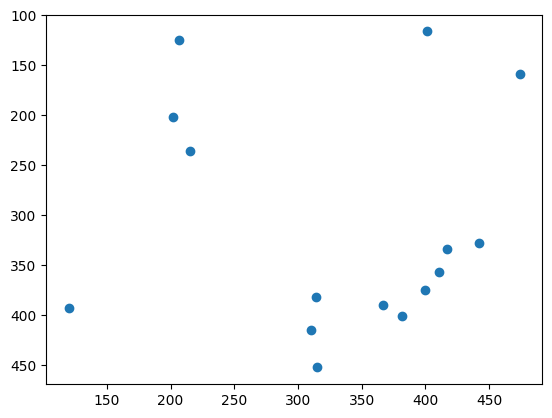

In [10]:
plt.gca().invert_yaxis()  # y軸を反転する
plt.scatter(data.loc[:, ['x']], data.loc[:, ['y']])

In [11]:
data2=data.loc[:,['x','y']]

In [12]:
km = KMeans(n_clusters=4, random_state=42)
label = km.fit_predict(data2[:])

/Users/haruhiro/anaconda3/envs/sua/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


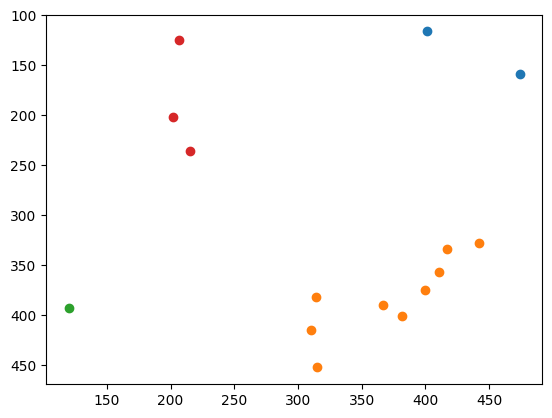

In [13]:
plt.gca().invert_yaxis()  # y軸を反転する
for i in range(4):
    plt.scatter(data.loc[:, ['x']][label==i], data.loc[:, ['y']][label==i])
# plt.scatter(data.loc[:, ['z']][label==0], data.loc[:, ['x']][label==0])
# plt.scatter(data.loc[:, ['z']][label==1], data.loc[:, ['x']][label==1])
# plt.scatter(data.loc[:, ['z']][label==2], data.loc[:, ['x']][label==2])
# plt.scatter(data.loc[:, ['z']][label==3], data.loc[:, ['x']][label==3])
plt.show()

[0.5441036, 0.36416107, 0.35129303, 0.480129]
[0.39961624, 0.32612833, 0.2540708, 0.32135695]
[0.2867504, 0.2568283, 0.3579315, 0.1581148]
[0.3273663, 0.32364056, 0.292893, 0.22292258]


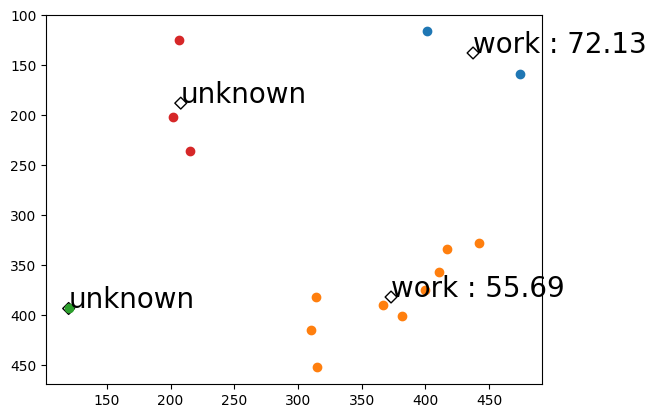

In [16]:
dd1=data.loc[:, ['y']][label==0]
ddList1 = dd1["y"].index.to_list()
dd2=data.loc[:, ['y']][label==1]
ddList2 = dd2["y"].index.to_list()
dd3=data.loc[:, ['y']][label==2]
ddList3 = dd3["y"].index.to_list()
dd4=data.loc[:, ['y']][label==3]
ddList4 = dd4["y"].index.to_list()

observedList1 =[]
for i in ddList1:
    observedList1.append(obj_array[i])

observedList2 =[]
for i in ddList2:
    observedList2.append(obj_array[i]) 

observedList3 =[]
for i in ddList3:
    observedList3.append(obj_array[i])

observedList4 =[]
for i in ddList4:
    observedList4.append(obj_array[i])


centers = km.cluster_centers_
plt.gca().invert_yaxis()  # y軸を反転する
plt.scatter(centers[:, 0], centers[:, 1], marker="D", facecolors='none', edgecolors='black')
observed_lists = [observedList1, observedList2, observedList3, observedList4]
utilization_class_list = ['work','rest','dining','read']
utilization = 'none'

for i, observed_list in enumerate(observed_lists):
    score = [np.mean([model.similarity(utilization, observe) for observe in observed_list]) 
             for utilization in utilization_class_list]
    max_socre = np.max(score)

    similar_list = model.most_similar(f"{utilization}")
    most_similar_score =similar_list[0][1]
    prob = max_socre / most_similar_score *100

    max_index = np.argmax(score)
    print(score)
    utilization = utilization_class_list[max_index]
    plt.scatter(data.loc[:, ['x']][label==i], data.loc[:, ['y']][label==i])
    if prob>50:
        plt.text(centers[i][0], centers[i][1], f"{utilization} : {round(prob, 2)}", fontsize=20)
    else:
        plt.text(centers[i][0], centers[i][1], f"unknown", fontsize=20)
    